# 吴恩达机器学习课后练习 1: Linear Regression

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 一元线性回归

In [2]:
#读入数据
datafile = 'data/ex1data1.txt'
data = pd.read_table(datafile,sep = ',',header=None)
#得到矩阵"X"向量"y" 
X = data.iloc[:,:-1].values
y = data.iloc[:,-1:].values
m = y.size # 得到训练集的个数
X = np.insert(X,0,1,axis=1)#补充X_0=1

### 数据展示(Plotting the data)

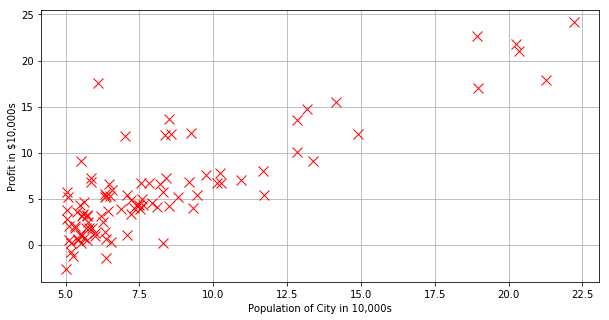

In [3]:
fig,ax = plt.subplots(figsize=(10,5))
ax.plot(X[:,1],y[:,0],'rx',markersize=10)
plt.grid(True)#增加格线
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')#横纵坐标
plt.show()

### 梯度下降(Gradient Descent)

In [4]:
iterations = 1500
alpha = 0.01
initial_theta = np.zeros(2)

In [5]:
def h(theta,X): #Linear hypothesis function
    return np.dot(X,theta)#np.dot指矩阵相乘，X为矩阵，theta为一列的矩阵
def computeCost(mytheta,X,y): #Cost function
    """
    theta_start is an n- dimensional vector of initial theta guess
    X is matrix with n- columns and m- rows
    y is a matrix with m- rows and 1 column
    """
    #note to self: *.shape is (rows, columns)
    return float((1./(2*m)) * np.dot((h(mytheta,X)-y).T,(h(mytheta,X)-y)))
initial_theta = np.zeros((X.shape[1],1)) #(theta is a vector with n rows and 1 columns (if X has n features) )
print(computeCost(initial_theta,X,y))

32.07273387745567


In [6]:
def GradientDescent(X, theta_star = initial_theta):
    theta = theta_star
    jvec = []
    thetahistory = []
    for meaninglessvariable in range(iterations):
        temtheta = theta
        jvec.append(computeCost(theta,X,y))
        thetahistory.append(temtheta)
        for j in range(len(temtheta)):
            temtheta[j] = theta[j]-(alpha/m)*np.sum(np.multiply(h(theta,X)-y,X[:,j].reshape(m,1)))
        theta = temtheta
    return theta, thetahistory, jvec

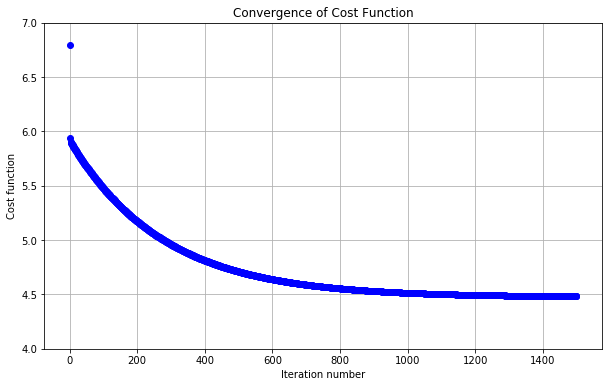

In [7]:
#Actually run gradient descent to get the best-fit theta values
initial_theta = np.zeros((X.shape[1],1))
theta, thetahistory, jvec = GradientDescent(X,initial_theta)

#Plot the convergence of the cost function
def plotConvergence(jvec):
    plt.figure(figsize=(10,6))
    plt.plot(range(len(jvec)),jvec,'bo')
    plt.grid(True)
    plt.title("Convergence of Cost Function")
    plt.xlabel("Iteration number")
    plt.ylabel("Cost function")
    dummy = plt.xlim([-0.05*iterations,1.05*iterations])
    #dummy = plt.ylim([4,8])


plotConvergence(jvec)
dummy = plt.ylim([4,7])

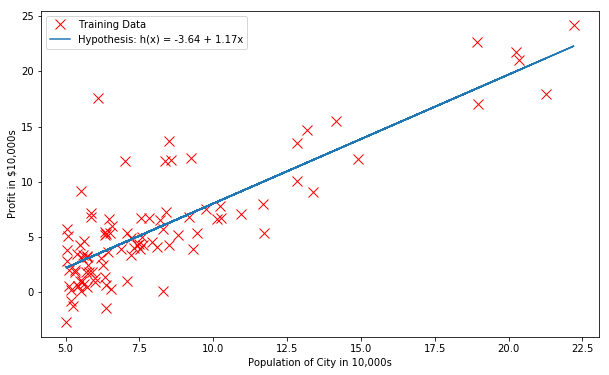

In [8]:
def myfit(xval):
    return theta[0]+theta[1]*xval
plt.figure(figsize=(10,6))
plt.plot(X[:,1],y[:,0],'rx',markersize=10,label='Training Data')
plt.plot(X[:,1],myfit(X[:,1]),label = 'Hypothesis: h(x) = %0.2f + %0.2fx'%(theta[0],theta[1]))
plt.legend()
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.show()